# Bootstrap Analaysis Code for SBM Simulation Engine

James Yu, 15 June 2023

In [1]:
using FileIO, Statistics, Distributions, Plots
NUMBER_OF_TYPES = 4
NUMBER_OF_SINKS = 4;

In [2]:
true_bootstrap_output = load(".estimates/bootstrap_output_basis.jld2")
unsimulated_bootstrap_output = load(".estimates/bootstrap_output_unsimulated.jld2")
simulated_bootstrap_output = load(".estimates/bootstrap_output_simulated.jld2")

Dict{String, Any} with 5 entries:
  "placement_rates"  => [1.44136 0.0817901 0.0100358 0.000768049; 0.759259 0.13…
  "type_allocation"  => [3.0 2.0 … 2.0 2.0; 3.0 2.0 … 2.0 2.0; … ; 8.0 8.0 … 8.…
  "placement_counts" => [467.0 53.0 28.0 3.0; 492.0 174.0 79.0 9.0; … ; 444.0 1…
  "likelihoods"      => [-28910.3, -29481.9, -29436.9, -28607.8, -28416.5, -295…
  "dept_labels"      => ["Aalto University" "Aalto University" … "Aalto Univers…

In [3]:
true_mean = mean(true_bootstrap_output["placement_rates"], dims = 3)

8×4×1 Array{Float64, 3}:
[:, :, 1] =
 1.43172    0.103907   0.0116092   0.00109103
 0.647341   0.12744    0.0128573   0.00123356
 0.255377   0.103307   0.0144051   0.0011396
 0.0165294  0.0149962  0.00229465  0.00131401
 0.332648   0.0775712  0.0117757   0.00617972
 0.193457   0.059486   0.00757036  0.00150689
 0.210417   0.0432456  0.00475432  0.000652057
 0.0269249  0.015927   0.00376403  0.000769239

In [4]:
unsimulated_mean = mean(unsimulated_bootstrap_output["placement_rates"], dims = 3)

8×4×1 Array{Float64, 3}:
[:, :, 1] =
 1.51798    0.102508   0.008878    0.00191527
 0.747878   0.147724   0.0157634   0.00147451
 0.27913    0.105306   0.0167211   0.00091548
 0.0235667  0.0179033  0.00219656  0.00115198
 0.405357   0.0820767  0.0121226   0.00783322
 0.203546   0.0747708  0.0076845   0.00128342
 0.215616   0.046872   0.00568201  0.000921183
 0.0260516  0.0182948  0.00402633  0.000794034

In [5]:
simulated_mean = mean(simulated_bootstrap_output["placement_rates"], dims = 3)

8×4×1 Array{Float64, 3}:
[:, :, 1] =
 0.950673   0.0693785  0.00851223  0.0199247
 0.459226   0.126189   0.0109702   0.0292813
 0.168727   0.0591549  0.0101746   0.0036289
 0.0218211  0.0401433  0.00174358  0.0590585
 0.292234   0.0544992  0.0108298   0.0198914
 0.160166   0.045659   0.00561995  0.00526732
 0.158647   0.0297322  0.00427056  0.0080359
 0.0236039  0.0116079  0.00297308  0.00132666

In [6]:
var(true_bootstrap_output["placement_rates"], dims = 3)

8×4×1 Array{Float64, 3}:
[:, :, 1] =
 0.0270429    0.000875605  4.64905e-6  4.1122e-7
 0.00926978   0.000545875  1.11531e-5  1.60719e-7
 0.00097239   0.000243553  7.85601e-6  7.46094e-8
 3.6962e-5    1.59107e-5   2.45176e-7  4.18569e-8
 0.00143525   0.000160369  1.16413e-5  2.85325e-6
 0.000215062  8.80018e-5   1.53974e-6  9.94237e-8
 0.000312144  6.38157e-5   9.39679e-7  3.84705e-8
 2.40983e-6   3.6322e-6    1.99479e-7  6.2029e-9

In [7]:
var(unsimulated_bootstrap_output["placement_rates"], dims = 3)

8×4×1 Array{Float64, 3}:
[:, :, 1] =
 0.00444101   0.000176706  2.28502e-6  5.41058e-7
 0.00127693   9.7304e-5    2.07894e-6  2.15076e-7
 9.73372e-5   1.279e-5     7.44073e-7  3.00273e-8
 5.22676e-6   2.04984e-6   7.73671e-8  1.78965e-8
 0.000958097  7.50071e-5   3.54163e-6  2.09845e-6
 0.00011368   1.72345e-5   4.2575e-7   4.37363e-8
 0.000111834  1.17705e-5   3.02389e-7  2.74244e-8
 1.61913e-6   6.54426e-7   3.10191e-8  3.48924e-9

In [8]:
var(simulated_bootstrap_output["placement_rates"], dims = 3)

8×4×1 Array{Float64, 3}:
[:, :, 1] =
 0.295495     0.00930927  8.90896e-6  0.0138043
 0.0839945    0.0764278   4.08805e-5  0.0318558
 0.0118079    0.0024049   5.42792e-5  0.000352139
 0.000264491  0.0375317   8.0067e-7   0.132795
 0.0118774    0.0027321   1.72004e-5  0.00668387
 0.00185987   0.0018093   5.87379e-6  0.000660101
 0.00330382   0.00101643  3.875e-6    0.00208268
 7.35989e-6   4.93064e-5  1.50642e-6  1.49174e-5

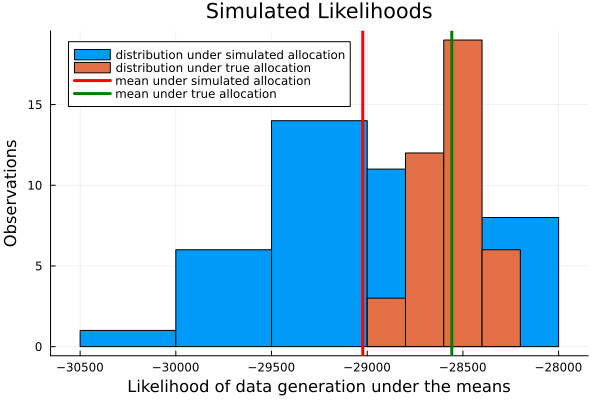

In [9]:
histogram(simulated_bootstrap_output["likelihoods"], label = "distribution under simulated allocation", title = "Simulated Likelihoods", xlabel = "Likelihood of data generation under the means", ylabel = "Observations")
histogram!(unsimulated_bootstrap_output["likelihoods"], label = "distribution under true allocation")
vline!([mean(simulated_bootstrap_output["likelihoods"])], width=3, label = "mean under simulated allocation", color = "red")
vline!([mean(unsimulated_bootstrap_output["likelihoods"])], width=3, label = "mean under true allocation", color = "green")

The additional variability in the simulated type allocation comes from the additional variability in the estimated type allocation itself.

In [13]:
unsimulated_average_type_allocation = mean(unsimulated_bootstrap_output["type_allocation"], dims = 2)
simulated_average_type_allocation = mean(simulated_bootstrap_output["type_allocation"], dims = 2)

for sorted_type in 1:NUMBER_OF_TYPES
    counter = 0
    inst_hold = []
    println("TYPE $sorted_type:")
    for (i, assign_type) in enumerate(Int.(round.(unsimulated_average_type_allocation)))
        if sorted_type == assign_type
            push!(inst_hold, (i, unsimulated_bootstrap_output["dept_labels"][i, 1]))
            counter += 1
        end
    end
    for (i, dept) in sort(inst_hold, by = x->x[2])
        unsimulated_frequency = unsimulated_bootstrap_output["type_allocation"][i, :]
        simulated_frequency = simulated_bootstrap_output["type_allocation"][i, :]
        unsimulated_counter_table = zeros(Int64, NUMBER_OF_TYPES)
        simulated_counter_table = zeros(Int64, NUMBER_OF_TYPES)
        for element in unsimulated_frequency
            unsimulated_counter_table[Int(element)] += 1
        end
        for element in simulated_frequency
            simulated_counter_table[Int(element)] += 1
        end
        print(dept)
        print(": Avg Type ($(unsimulated_average_type_allocation[i]), $(simulated_average_type_allocation[i])) (")
        seen = false
        for (t, num) in enumerate(unsimulated_counter_table)
            if num != 0
                if seen print(", ") end
                seen = true
                print("Type $t: $(num)x")
            end
        end
        print(") ")
        print("(")
        seen = false
        for (t, num) in enumerate(simulated_counter_table)
            if num != 0
                if seen print(", ") end
                seen = true
                print("Type $t: $(num)x")
            end
        end
        println(")")
    end
    println("Total Institutions: $counter")
    println()
end

TYPE 1:
Boston University: Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
Columbia University: Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
Duke University: Avg Type (1.0, 1.025) (Type 1: 40x) (Type 1: 39x, Type 2: 1x)
Harvard University: Avg Type (1.0, 1.025) (Type 1: 40x) (Type 1: 39x, Type 2: 1x)
London School of Economics and Political Science: Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
Massachusetts Institute of Technology: Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
New York University: Avg Type (1.0, 1.025) (Type 1: 40x) (Type 1: 39x, Type 2: 1x)
Northwestern University: Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
Princeton University: Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
Stanford University: Avg Type (1.0, 1.025) (Type 1: 40x) (Type 1: 39x, Type 2: 1x)
University of California Los Angeles (UCLA): Avg Type (1.0, 1.075) (Type 1: 40x) (Type 1: 39x, Type 4: 1x)
University